# Table of Contents
- Helper Functions
- National Climate Dater Center
- NYCHA Building
- Citibikes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### NCDC

Source:
https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00094728/detail

In [35]:
noaa = pd.read_csv('data/2070456.csv')
noaa_detailed = pd.read_csv('data/2070451.csv')

In [39]:
noaa.info()
noaa.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 22 columns):
STATION    2410 non-null object
NAME       2410 non-null object
DATE       2410 non-null object
AWND       2244 non-null float64
PGTM       1 non-null float64
PRCP       2410 non-null float64
SNOW       2409 non-null float64
SNWD       2410 non-null float64
TAVG       0 non-null float64
TMAX       2410 non-null int64
TMIN       2410 non-null int64
TSUN       1 non-null float64
WDF2       2247 non-null float64
WDF5       2233 non-null float64
WSF2       2247 non-null float64
WSF5       2233 non-null float64
WT01       822 non-null float64
WT02       46 non-null float64
WT03       55 non-null float64
WT04       5 non-null float64
WT06       14 non-null float64
WT08       451 non-null float64
dtypes: float64(17), int64(2), object(3)
memory usage: 414.3+ KB


(2410, 22)

In [24]:
noaa_detailed.columns = noaa_detailed.columns.str.lower()

In [33]:
NYC_coord = noaa_detailed.loc[:,['latitude','longitude']]

In [40]:
print(NYC_coord.shape)
NYC_coord.sample()

(2410, 2)

## NOAA column info
- STATION = USW00094728
- NAME = NY CITY CENTRAL PARK, NY US
- DATE = YYYY-MM-DD
- AWND = Average daily wind speed (meters per second or miles per hour as per user preference)
- PGTM = Peak gust time (hours and minutes, i.e., HHMM)

#### 9’s in a field (e.g.9999) indicate missing data or data that has not been received.

- PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
- SNOW = Snowfall
- SNWD = Snowdepth
- TAVG = ? (all nan)
- TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths
- TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths 
- TSUN = Daily total sunshine (minutes)
- WDF2 = Direction of fastest 2-minute wind (degrees)
- WDF5 = Direction of fastest 5-**second** wind (degrees)
- WSF2 = Fastest 2-minute wind speed (miles per hour or meters per second as per user preference)
- WSF5 = Fastest 5-**second** wind speed (miles per hour or meters per second as per user preference)

#### WT** = Weather Type where ** has one of the following values: 
- **01 = Fog, ice fog, or freezing fog (may include heavy fog)**
- **02 = Heavy fog or heaving freezing fog (not always distinguished from fog)**
- **03 = Thunder**
- **04 = Ice pellets, sleet, snow pellets, or small hail**
- 05 = Hail (may include small hail)
- **06 = Glaze or rime**
- 07 = Dust, volcanic ash, blowing dust, blowing sand, or blowing obstruction
- **08 = Smoke or haze**
- 09 = Blowing or drifting snow
- 10 = Tornado, waterspout, or funnel cloud
- 11 = High or damaging winds
- 12 = Blowing spray
- 13 = Mist
- 14 = Drizzle
- 15 = Freezing drizzle
- 16 = Rain (may include freezing rain, drizzle, and freezing drizzle)
- 17 = Freezing rain
- 18 = Snow, snow pellets, snow grains, or ice crystals
- 19 = Unknown source of precipitation
- 21 = Ground fog
- 22 = Ice fog or freezing fog

In [42]:
NYclimate = pd.concat([NYC_coord, noaa], axis =1)
NYclimate.shape

(2410, 24)

In [44]:
NYclimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 24 columns):
latitude     2410 non-null float64
longitude    2410 non-null float64
STATION      2410 non-null object
NAME         2410 non-null object
DATE         2410 non-null object
AWND         2244 non-null float64
PGTM         1 non-null float64
PRCP         2410 non-null float64
SNOW         2409 non-null float64
SNWD         2410 non-null float64
TAVG         0 non-null float64
TMAX         2410 non-null int64
TMIN         2410 non-null int64
TSUN         1 non-null float64
WDF2         2247 non-null float64
WDF5         2233 non-null float64
WSF2         2247 non-null float64
WSF5         2233 non-null float64
WT01         822 non-null float64
WT02         46 non-null float64
WT03         55 non-null float64
WT04         5 non-null float64
WT06         14 non-null float64
WT08         451 non-null float64
dtypes: float64(19), int64(2), object(3)
memory usage: 452.0+ KB


In [49]:
NYclimate['Raincheck']= 0
NYclimate['Raincheck']= NYclimate['PRCP']!=0

In [51]:
NYclimate.to_csv('NYC_climate.csv', index = False)

Prepare Visual for comparing min and max temperature, prcp with bike usage

### NYCHA Building Locations
Source:
https://data.cityofnewyork.us/Housing-Development/Map-of-NYCHA-Developments/i9rv-hdr5

In [2]:
#!pip install geopandas
#!pip install descartes #For ploting polygons
import geopandas

In [3]:
geospatial = geopandas.read_file('data/Map of NYCHA Developments.geojson')

In [4]:
geospatial.head()

,borough,developmen,tds_num,geometry
0,BRONX,1010 EAST 178TH STREET,180,"MULTIPOLYGON (((-73.88092 40.84050, -73.88068 ..."
1,BROOKLYN,104-14 TAPSCOTT STREET,242,"MULTIPOLYGON (((-73.92074 40.66492, -73.92076 ..."
2,BRONX,1162-1176 WASHINGTON AVENUE,233,"MULTIPOLYGON (((-73.90695 40.83009, -73.90699 ..."
3,MANHATTAN,131 SAINT NICHOLAS AVENUE,154,"MULTIPOLYGON (((-73.95366 40.80416, -73.95364 ..."
4,BRONX,1471 WATSON AVENUE,214,"MULTIPOLYGON (((-73.88104 40.82640, -73.88097 ..."


In [5]:
type(geospatial)

geopandas.geodataframe.GeoDataFrame

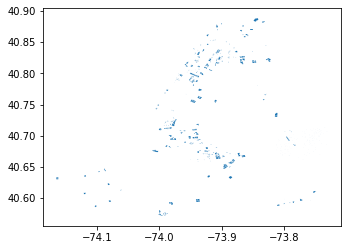

In [106]:
geospatial.plot() #NYC Locations

In [ ]:
# Plot larger visual

# Citibike Analysis

In [5]:
bikes = pd.read_csv('data/201306-citibike-tripdata.csv')

In [16]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577703 entries, 0 to 577702
Data columns (total 15 columns):
tripduration               577703 non-null int64
starttime                  577703 non-null object
stoptime                   577703 non-null object
start station id           577703 non-null int64
start station name         577703 non-null object
start station latitude     577703 non-null float64
start station longitude    577703 non-null float64
end station id             559644 non-null float64
end station name           559644 non-null object
end station latitude       559644 non-null float64
end station longitude      559644 non-null float64
bikeid                     577703 non-null int64
usertype                   577703 non-null object
birth year                 337382 non-null float64
gender                     577703 non-null int64
dtypes: float64(6), int64(4), object(5)
memory usage: 66.1+ MB


In [6]:
from mofo_bikes.notebooks import HelperFn as fn

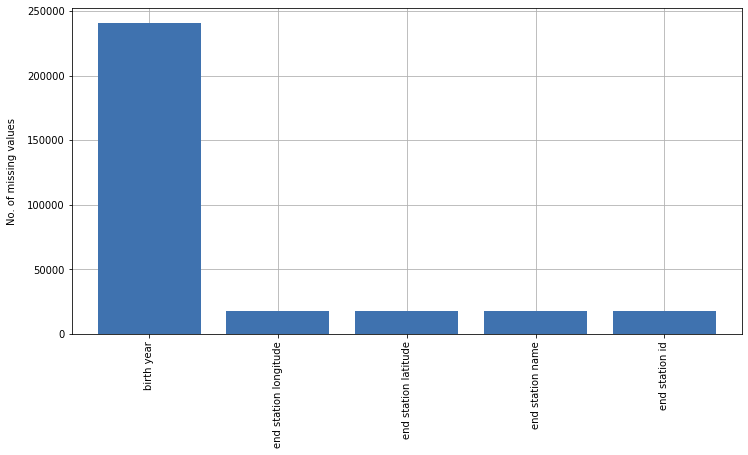

In [7]:
fn.highest_NA(bikes)

In [8]:
# Convert Seconds to minutes
bikes['tripduration']  = bikes['tripduration']/60

In [9]:
# Remove 0 distance stations
bikes.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,577703.000000,577703.000000,577703.000000,577703.000000,559644.000000,559644.000000,559644.000000,577703.000000,337382.000000,577703.000000
mean,22.876171,439.228836,40.732436,-73.991251,441.910624,40.732146,-73.991244,17617.434516,1974.644945,0.710431
std,150.467717,337.240318,0.021423,0.013002,345.448311,0.021507,0.013105,1677.518719,10.780255,0.678268
min,1.016667,72.000000,40.646607,-74.017134,72.000000,40.646607,-74.017134,14529.000000,1899.000000,0.000000
25%,8.566667,309.000000,40.717400,-74.001768,309.000000,40.716887,-74.001971,16161.000000,1968.000000,0.000000
50%,14.566667,404.000000,40.734546,-73.990741,403.000000,40.734232,-73.990741,17638.000000,1977.000000,1.000000
75%,23.300000,482.000000,40.749013,-73.981948,482.000000,40.748549,-73.981923,19066.000000,1983.000000,1.000000
max,64607.983333,3020.000000,40.771522,-73.950048,3020.000000,40.771522,-73.950048,20625.000000,1997.000000,2.000000


In [10]:
import random
import os 
import glob #Unix style pathname pattern expansion
 #Changes direction to the folder

In [95]:
os.chdir('data/201307-201402-citibike-tripdata')

In [96]:
random.seed(0)
my_dfs = []
extension = 'csv'

# Uses glob fn from glob to match the extension pattern (csv). Written in regex

all_filenames = [i for i in glob.glob('*.{}'.format(extension) )]

i = 1
for csv in all_filenames:
    df_downsample = fn.pd_read_downsample(csv, 0.01)
    my_dfs.append(df_downsample)
    print('csv {} completed'.format(i))
    i += 1
    
fin_dat = pd.concat(my_dfs)

In [97]:
print(fin_dat.shape)
print(bikes.shape)

(55624, 15)
(577703, 15)


In [120]:
os.chdir('../..')

In [26]:
?fn.file_compressor

In [15]:
# Testing the file compressor with non-JS files
fn.file_compressor(
    startdir = 'data/201307-201402-citibike-tripdata',
    returndir = '../..',
    export = True
               )

csv 1 completed
csv 2 completed
csv 3 completed
csv 4 completed
csv 5 completed
csv 6 completed
csv 7 completed
csv 8 completed
Dataframe variable is set as finished_df
finished_df printed as combined_csv.csv
Complete!


In [21]:
finished_csv = pd.read_csv('data/201307-201402-citibike-tripdata/combined_csv.csv')

In [22]:
print(bikes.shape)
#print(fin_dat.shape)
#print(finished_df.shape)
print(finished_csv.shape)

(577703, 15)
(55624, 15)


In [24]:
js_csv = pd.read_csv('data/citibike_data/JC-201509-citibike-tripdata.csv')

In [29]:
js_csv.columns = js_csv.columns.str.lower()

In [35]:
js_csv.columns = js_csv.columns.str.replace(' ','')

In [ ]:
js_csv.to_csv('data/citibike_data/JC-201509-citibike-tripdata.csv',)

In [27]:
fn.file_compressor(
    startdir = 'data/citibike_data',
    returndir = '../..',
    parse_dates = ['Start Time','Stop Time'],
    export = True,
    name = 'five_yr_citibike.csv'
                  )

csv 1 completed
csv 2 completed


ValueError: 'Start Time' is not in list